In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/YBIGTA/스터디/세션 복습/data/test_err_data.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [6]:
# Q1
df.head(5)

,time,model_nm,fwver,errtype,errcode
user_id,,,,,
30000,20201101030227,model_1,04.16.3553,31,1
30000,20201101030227,model_1,04.16.3553,33,2
30000,20201101030228,model_1,04.16.3553,15,1
30000,20201101030256,model_1,04.16.3553,22,1
30000,20201101030300,model_1,04.16.3553,11,1


In [7]:
df.shape

(16532648, 5)

---
### 2) 결측치 확인

In [8]:
# Q2
missing_num = df.isnull().sum()
missing_num

time        0
model_nm    0
fwver       0
errtype     0
errcode     4
dtype: int64

In [9]:
#결측치 있는 errcode만 날리기
df['errcode'].dropna()

user_id
30000    1
30000    2
30000    1
30000    1
30000    1
        ..
44998    0
44998    1
44998    1
44998    1
44998    0
Name: errcode, Length: 16532644, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16532648 entries, 30000 to 44998
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   time      int64 
 1   model_nm  object
 2   fwver     object
 3   errtype   int64 
 4   errcode   object
dtypes: int64(2), object(3)
memory usage: 756.8+ MB


In [11]:
df['model_nm'].unique()

array(['model_1', 'model_2', 'model_3', 'model_0', 'model_4', 'model_5',
       'model_6', 'model_7', 'model_8'], dtype=object)

In [12]:
df['fwver'].unique()

array(['04.16.3553', '04.16.3571', '04.33.1261', '05.15.2138',
       '04.22.1750', '04.22.1778', '04.33.1149', '03.11.1167',
       '04.33.1185', '04.22.1684', '05.15.2120', '04.82.1684',
       '04.82.1778', '10', '05.66.3237', '04.73.2569', '04.73.2571',
       '04.73.2237', '04.73.2577', '04.82.1730', '04.22.1478', '8.5.3',
       '04.22.1666', '04.22.1656', '03.11.1149', '04.33.1171',
       '05.66.3571', '04.16.3439', '05.15.2092', '03.11.1141',
       '04.22.1608', '05.15.3104', '04.33.1125', '04.22.1448',
       '05.15.2114', '10.22.1770', '10.22.1780', '04.16.3569',
       '04.22.1772', '04.22.1170'], dtype=object)

In [13]:
df['errtype'].unique()

array([31, 33, 15, 22, 11, 12, 23, 26, 16, 17,  5, 39, 24, 40, 36, 37, 32,
       42, 14, 18, 25, 20, 35,  6,  7,  4,  3, 13, 27, 28, 41, 34, 38,  1,
        8, 21, 19,  2, 10, 30,  9])

In [14]:
df['errcode'].unique()

array(['1', '2', 'connection timeout', ..., '5803', '5444', '5691'],
      dtype=object)

In [50]:
df['errtype'].value_counts()

23    2460484
31    2093732
22    1902001
15    1611821
16    1252863
4     1186399
32    1105789
5      910821
40     727986
26     533975
28     424580
27     421010
11     327050
12     304129
14     293938
33     178282
34     157135
10     149008
41     108244
7       56562
6       56413
17      48545
24      42362
42      34341
3       23382
1       22121
2       20869
39      20497
13      13944
35      12254
37       9445
36       9427
38       4754
18       2859
20       2216
25       1143
19        842
21        753
30        383
8         197
9          92
Name: errtype, dtype: int64

In [31]:
pd.get_dummies(df['model_nm']).head()

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8
user_id,,,,,,,,,
30000,0,1,0,0,0,0,0,0,0
30000,0,1,0,0,0,0,0,0,0
30000,0,1,0,0,0,0,0,0,0
30000,0,1,0,0,0,0,0,0,0
30000,0,1,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df['errtype']).head(10)

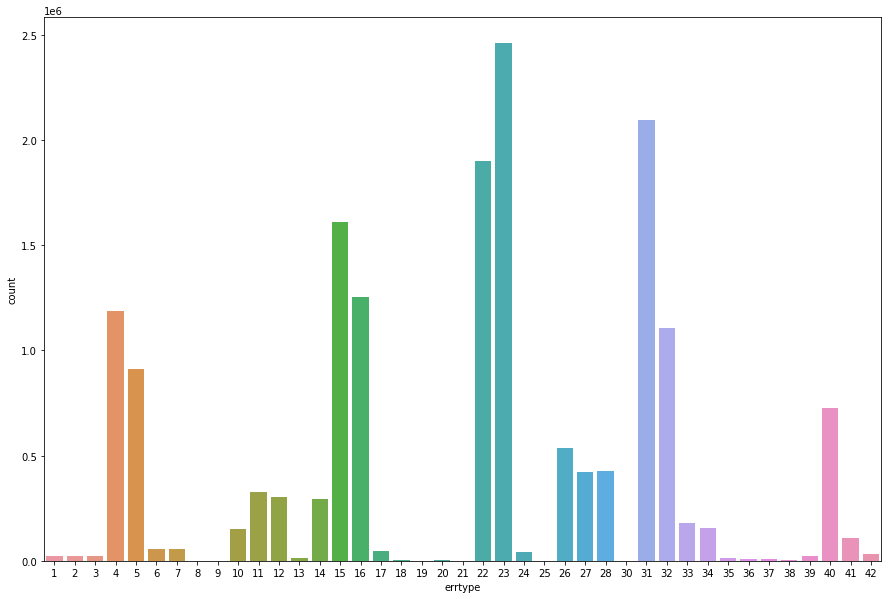

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x = "errtype", data=df)

In [49]:
temp = df.sort_values(by=['errtype'], axis=0, inplace=True)
temp.head(10)

KeyError: ignored

In [44]:
#'errtype'을 정렬해서 상위 10개만 뽑고, 에러타입별 모델을 시각화하려 했는데, 칼럼에서 sort_values를 써서 row를 추출할 수 없는 것인지 찾아보다가 결국 답을 알지 못하고 끝났습니다...

ValueError: ignored